In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle
from sklearn.model_selection import train_test_split
from scipy import stats

plt.rcParams['figure.figsize'] = [12,8]
alpha = .05

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import sklearn.preprocessing

In [2]:
df = wrangle.get_flight_data()
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [4]:
df = wrangle.prepare_flight_data(df)
df.head()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,TailNum,CRSElapsedTime,AirTime,...,NASDelay,SecurityDelay,LateAircraftDelay,Delayed_Status,Delayed,UniqueCarrier_DL,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_WN,departure_hour
51640,2008,1,1,2,14:29:00,1922,OO,N772SK,173,153,...,0,0,0,0,0,0,1,0,0,14
53353,2008,1,4,5,20:20:00,2138,OO,N767SK,198,195,...,0,0,98,2,1,0,1,0,0,20
53354,2008,1,4,5,14:29:00,1922,OO,N767SK,173,146,...,0,0,0,1,1,0,1,0,0,14
54134,2008,1,5,6,14:29:00,1922,OO,N768SK,173,143,...,0,0,20,1,1,0,1,0,0,14
54135,2008,1,5,6,12:37:00,1355,OO,N768SK,198,177,...,0,0,0,1,1,0,1,0,0,12


In [5]:
df.UniqueCarrier.value_counts()

AA    6162
DL    3541
UA    2403
WN     510
OO     230
Name: UniqueCarrier, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12846.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,12846.0,6.093103,3.353317,1.0,3.0,6.0,8.0,12.0
DayofMonth,12846.0,15.761871,8.715228,1.0,8.0,16.0,23.0,31.0
DayOfWeek,12846.0,3.984275,1.997640,1.0,2.0,4.0,6.0,7.0
CRSArrTime,12846.0,1659.090067,465.738592,5.0,1344.0,1730.0,2022.0,2359.0
CRSElapsedTime,12846.0,164.664721,49.138792,105.0,127.0,145.0,190.0,317.0
AirTime,12846.0,138.423322,49.251560,63.0,102.0,120.0,163.0,316.0
ArrDelay,12846.0,56.954071,52.106563,15.0,24.0,39.0,70.0,1357.0
DepDelay,12846.0,53.583606,52.463383,6.0,21.0,37.0,68.0,1355.0
Distance,12846.0,1014.780087,400.230057,641.0,732.0,862.0,1235.0,1946.0


### Train, validate, test split

In [7]:
def split_flight_data(df):
    ''' This function splits the cleaned dataframe into train, validate, and test 
    datasets.'''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123) 
    return train, validate, test

In [8]:
train, validate, test = split_flight_data(df)

In [9]:
train.shape, validate.shape, test.shape

((7193, 27), (3083, 27), (2570, 27))

### Explore

**Questions to ask**
- Does the airline impact flight delays?
- Does the airport impact flight delays?
     - Departure and Arrival
- Does the day of the week impact flight delays?
- Does the month impact flight delays?
- Are specific types of delays more likely to occur during a specified time?

In [10]:
train.Delayed_Status.value_counts()

1    4698
2    1547
3     464
0     250
4     234
Name: Delayed_Status, dtype: int64

In [11]:
train.ArrDelay.value_counts()

15      250
19      192
16      183
18      179
20      178
       ... 
313       1
318       1
219       1
1357      1
236       1
Name: ArrDelay, Length: 288, dtype: int64

In [12]:
for col in df.columns:
    print(df[col].value_counts())

2008    12846
Name: Year, dtype: int64
6     1450
3     1326
7     1323
12    1261
5     1217
8     1183
1     1132
4     1091
2     1064
10     627
11     605
9      567
Name: Month, dtype: int64
8     494
22    485
16    476
17    465
4     456
21    443
14    440
9     440
10    439
27    438
19    437
23    435
15    435
20    428
7     428
6     427
5     411
29    410
18    410
13    405
3     395
2     394
24    390
26    383
11    373
28    369
1     366
30    362
12    360
25    359
31    293
Name: DayofMonth, dtype: int64
5    2105
4    1957
1    1952
7    1880
2    1714
3    1713
6    1525
Name: DayOfWeek, dtype: int64
15:05:00    192
16:00:00    187
16:10:00    169
12:10:00    158
14:40:00    157
           ... 
19:42:00      1
07:03:00      1
14:14:00      1
12:29:00      1
14:04:00      1
Name: CRSDepTime, Length: 516, dtype: int64
2215    228
1730    177
1845    149
1720    140
1940    130
       ... 
1134      1
1308      1
2009      1
1909      1
1107      1
Name: CRSA

In [13]:
# # for col in train.columns:
#     plt.figure(figsize=(8,4))
#     plt.hist(df[col])
#     plt.title(col)
#     plt.show()

<AxesSubplot:>

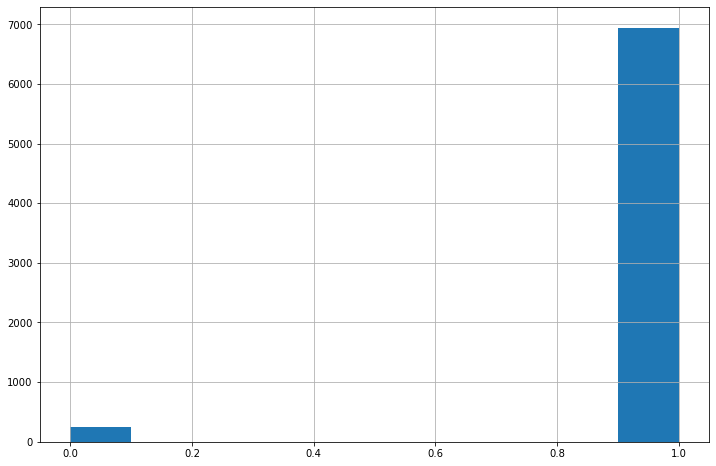

In [14]:
train.Delayed.hist()

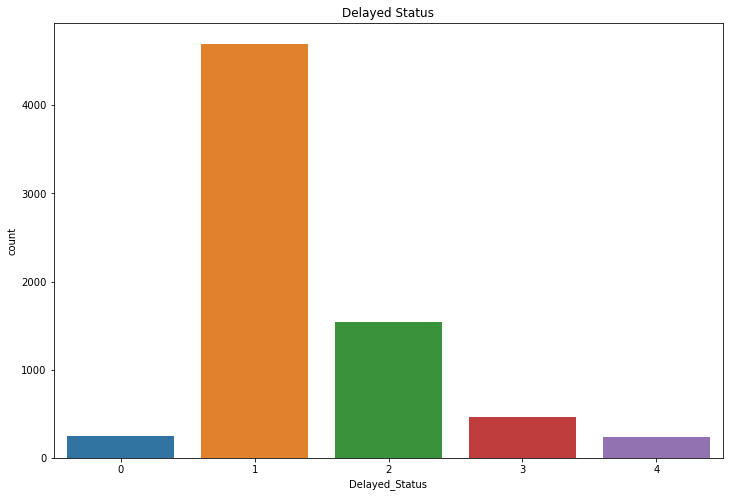

In [15]:
sns.countplot(train.Delayed_Status)
plt.title('Delayed Status')
plt.show()

The majority of delays are greater than 15 minutes but less than 60.

### Airline

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Delayed'>

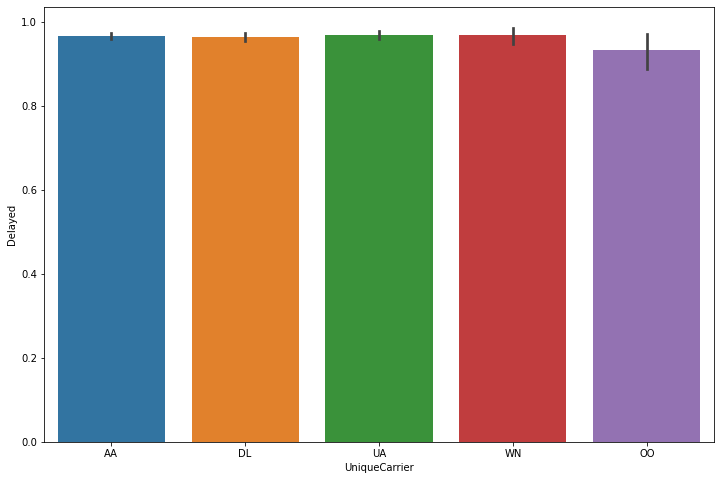

In [16]:
sns.barplot(data=train, x = 'UniqueCarrier', y = 'Delayed')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='Delayed_Status'>

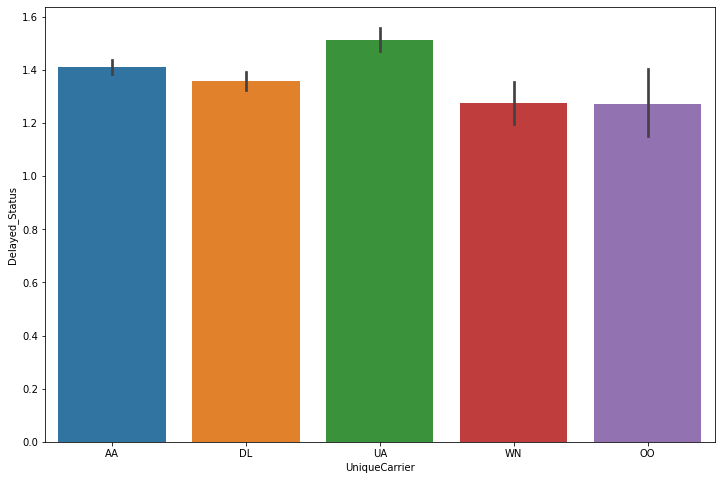

In [17]:
sns.barplot(data=train, x = 'UniqueCarrier', y = 'Delayed_Status')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='count'>

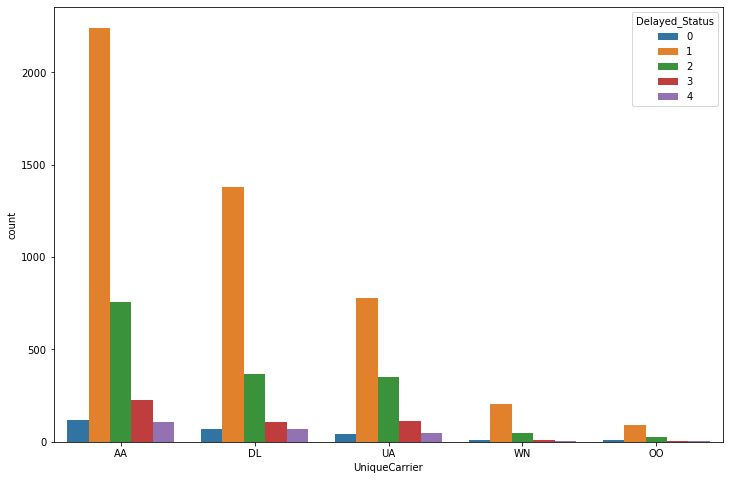

In [18]:
sns.countplot(data=train, x='UniqueCarrier', hue='Delayed_Status')

<AxesSubplot:xlabel='Delayed_Status', ylabel='count'>

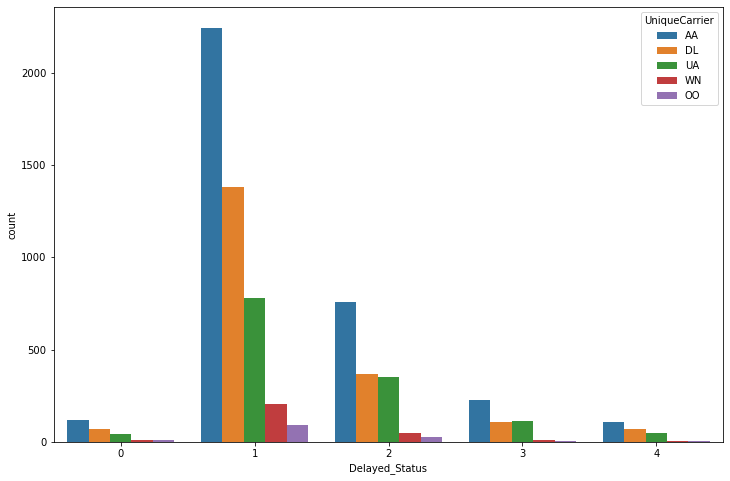

In [19]:
sns.countplot(data=train, x=train.Delayed_Status, hue=train.UniqueCarrier)

<AxesSubplot:xlabel='Delayed_Status', ylabel='ArrDelay'>

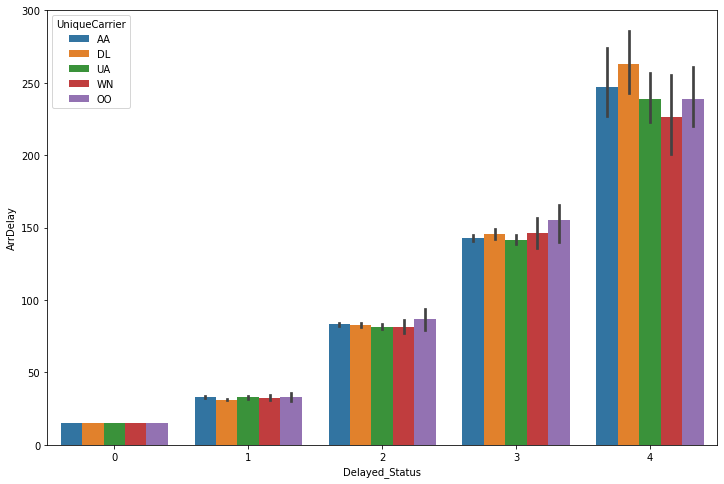

In [20]:
sns.barplot(data=train, y=train.ArrDelay, x=train.Delayed_Status, hue=train.UniqueCarrier)

Notes: Boxplot isn't very helpful. Countplot shows the variability the best between delayed status and airline, however each airline is not equally represented in the data and this could be misleading. 
The barplot with airline as the hue shows similarities in delayed status in group 0-2 but shows some variability between the airlines in groups 3-4 with AA, DL, and UA being most likely to have a delay greater than 5 hours.

In [21]:
AA = train[train.UniqueCarrier =='AA']
DL = train[train.UniqueCarrier =='DL']
UA = train[train.UniqueCarrier =='UA']
OO = train[train.UniqueCarrier =='OO']
WN = train[train.UniqueCarrier =='WN']

Text(0.5, 1.0, 'Southwest Airlines Delayed Status')

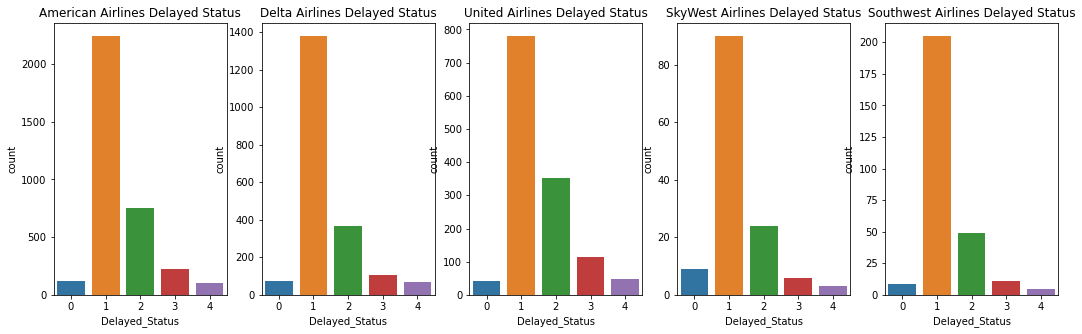

In [22]:
plt.figure(figsize=(18,5))
plt.subplot(151)
sns.countplot(data=AA, x='Delayed_Status')
plt.title('American Airlines Delayed Status')

plt.subplot(152)
sns.countplot(data=DL, x='Delayed_Status')
plt.title('Delta Airlines Delayed Status')

plt.subplot(153)
sns.countplot(data=UA, x='Delayed_Status')
plt.title('United Airlines Delayed Status')

plt.subplot(154)
sns.countplot(data=OO, x='Delayed_Status')
plt.title('SkyWest Airlines Delayed Status')

plt.subplot(155)
sns.countplot(data=WN, x='Delayed_Status')
plt.title('Southwest Airlines Delayed Status')

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and Airline are independent.
- Alternative Hypothesis: Delayed status and Airline are dependent.


In [23]:
observed = pd.crosstab(train.Delayed_Status, train.UniqueCarrier)

In [24]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.7969244654332686e-08

In [25]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


### Airport

<AxesSubplot:xlabel='Delayed_Status', ylabel='ArrDelay'>

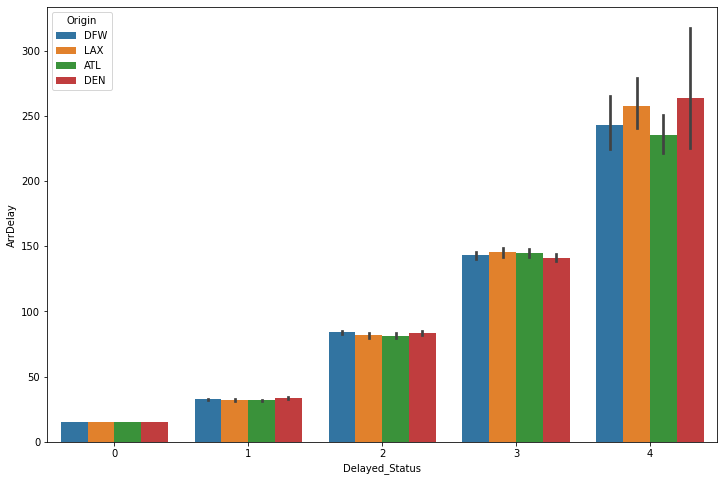

In [26]:
sns.barplot(data=train, x=train.Delayed_Status, y=train.ArrDelay, hue=train.Origin)

In [27]:
DFW = train[train.Origin =='DFW']
LAX = train[train.Origin =='LAX']
ATL = train[train.Origin =='ATL']
DEN = train[train.Origin =='DEN']

Text(0.5, 1.0, 'DEN Departure Delayed Status')

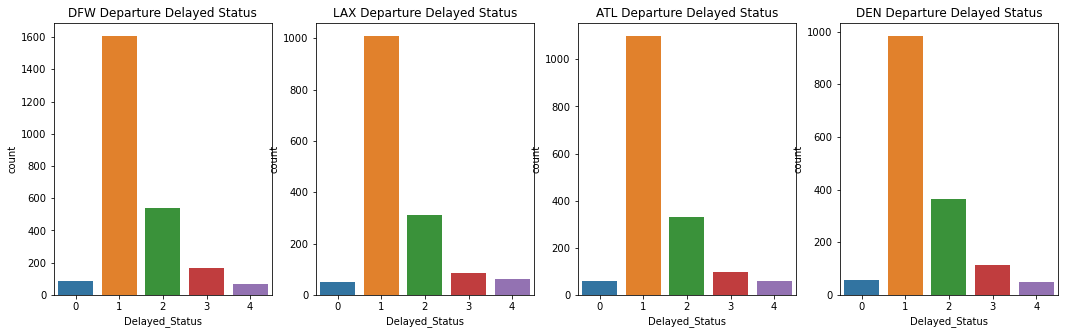

In [28]:
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.countplot(data=DFW, x='Delayed_Status')
plt.title('DFW Departure Delayed Status')

plt.subplot(142)
sns.countplot(data=LAX, x='Delayed_Status')
plt.title('LAX Departure Delayed Status')

plt.subplot(143)
sns.countplot(data=ATL, x='Delayed_Status')
plt.title('ATL Departure Delayed Status')

plt.subplot(144)
sns.countplot(data=DEN, x='Delayed_Status')
plt.title('DEN Departure Delayed Status')


The greatest variability between a flight's takeoff location is in delayed status 4 with Denver being the most likely to have a delay status of greater than 5 hours and Atlanta with the 

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and takeoff location are independent.
- Alternative Hypothesis: Delayed status and takeoff location are dependent.


In [29]:
observed = pd.crosstab(train.Delayed_Status, train.Origin)

In [30]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.10732864876528733

In [31]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null


### Arival Airport

In [32]:
DFW_d = train[train.Dest =='DFW']
LAX_d = train[train.Dest =='LAX']
ATL_d = train[train.Dest =='ATL']
DEN_d = train[train.Dest =='DEN']

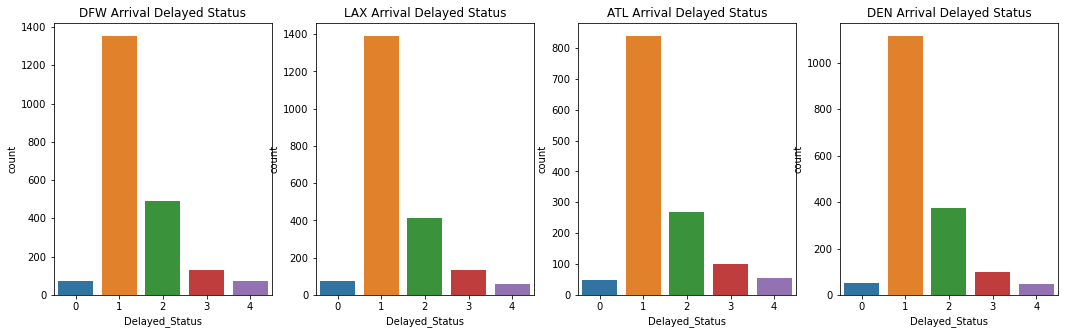

In [33]:
plt.figure(figsize=(18,5))
plt.subplot(141)
sns.countplot(data=DFW_d, x='Delayed_Status')
plt.title('DFW Arrival Delayed Status')

plt.subplot(142)
sns.countplot(data=LAX_d, x='Delayed_Status')
plt.title('LAX Arrival Delayed Status')

plt.subplot(143)
sns.countplot(data=ATL_d, x='Delayed_Status')
plt.title('ATL Arrival Delayed Status')

plt.subplot(144)
sns.countplot(data=DEN_d, x='Delayed_Status')
plt.title('DEN Arrival Delayed Status')
plt.show()

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and arrival location are independent.
- Alternative Hypothesis: Delayed status and arrival location are dependent.

In [34]:
observed = pd.crosstab(train.Delayed_Status, train.Dest)

In [35]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.10829858413351334

In [36]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Fail to reject the null


### Day of the week

<AxesSubplot:xlabel='DayOfWeek', ylabel='Delayed_Status'>

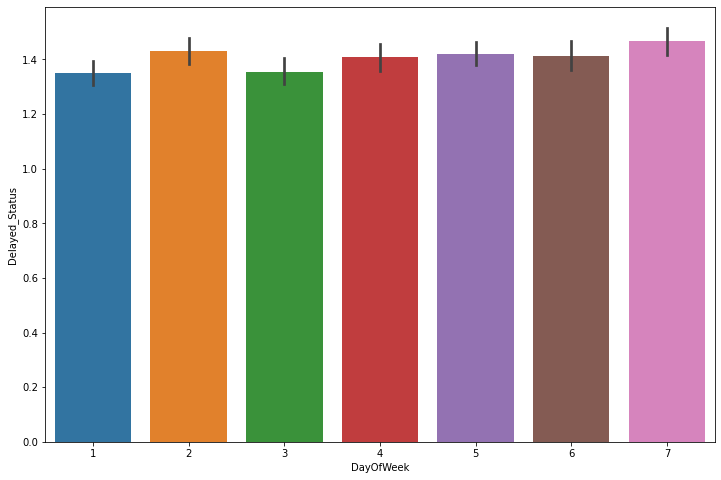

In [37]:
sns.barplot(data=train, x=train.DayOfWeek, y=train.Delayed_Status)

Tuesday and Sunday show the highest mean delayed status, with Monday and Wednesday being the lowest. Thursday, Friday, and Saturday seem to be in line with each other.

In [38]:
mon=train[train.DayOfWeek==1]
tue=train[train.DayOfWeek==2]
wed=train[train.DayOfWeek==3]
thur=train[train.DayOfWeek==4]
fri=train[train.DayOfWeek==5]
sat=train[train.DayOfWeek==6]
sun=train[train.DayOfWeek==7]

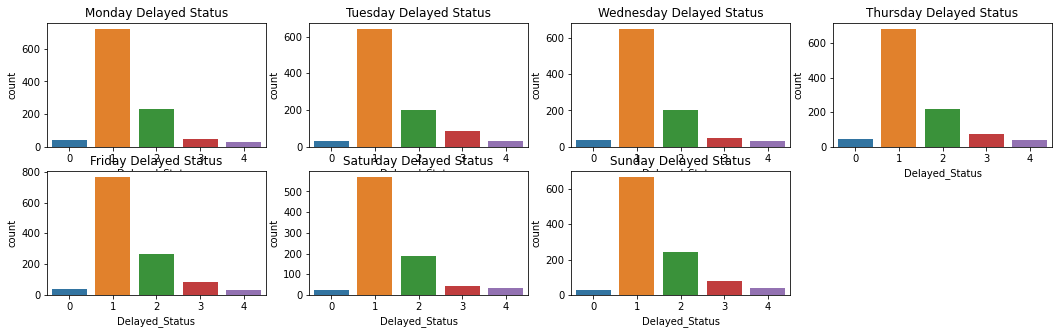

In [39]:
# plot delayed status per day of the week
plt.figure(figsize=(18,5))
plt.subplot(241)
sns.countplot(data=mon, x='Delayed_Status')
plt.title('Monday Delayed Status')

plt.subplot(242)
sns.countplot(data=tue, x='Delayed_Status')
plt.title('Tuesday Delayed Status')

plt.subplot(243)
sns.countplot(data=wed, x='Delayed_Status')
plt.title('Wednesday Delayed Status')

plt.subplot(244)
sns.countplot(data=thur, x='Delayed_Status')
plt.title('Thursday Delayed Status')

plt.subplot(245)
sns.countplot(data=fri, x='Delayed_Status')
plt.title('Friday Delayed Status')

plt.subplot(246)
sns.countplot(data=sat, x='Delayed_Status')
plt.title('Saturday Delayed Status')

plt.subplot(247)
sns.countplot(data=sun, x='Delayed_Status')
plt.title('Sunday Delayed Status')
plt.show()



This visualization doesn't show too much variability other than Tuesday's Delay status 3. Saturday has less flights than the other days, as indicated by the axis.


**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and day of the week are independent.
- Alternative Hypothesis: Delayed status and day of the week are dependent.

In [40]:
observed = pd.crosstab(train.Delayed_Status, train.DayOfWeek)

In [41]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

0.02563956820010972

In [42]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


### Month of the year

<AxesSubplot:xlabel='Month', ylabel='Delayed_Status'>

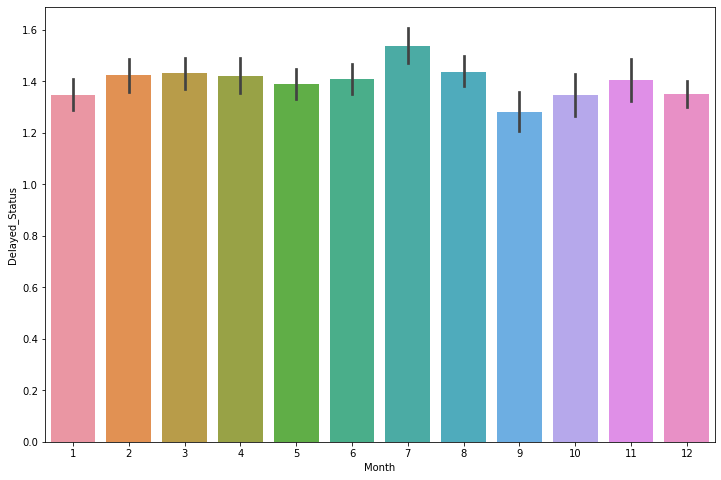

In [43]:
sns.barplot(data=train, x=train.Month, y=train.Delayed_Status)

Visually, variabity between months and delayed status is evident with July having the highest average delayed status.

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and month are independent.
- Alternative Hypothesis: Delayed status and month are dependent.

In [44]:
observed = pd.crosstab(train.Delayed_Status, train.Month)

In [45]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

8.145267866834006e-05

In [46]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


### Day of the month

<AxesSubplot:xlabel='DayofMonth', ylabel='Delayed_Status'>

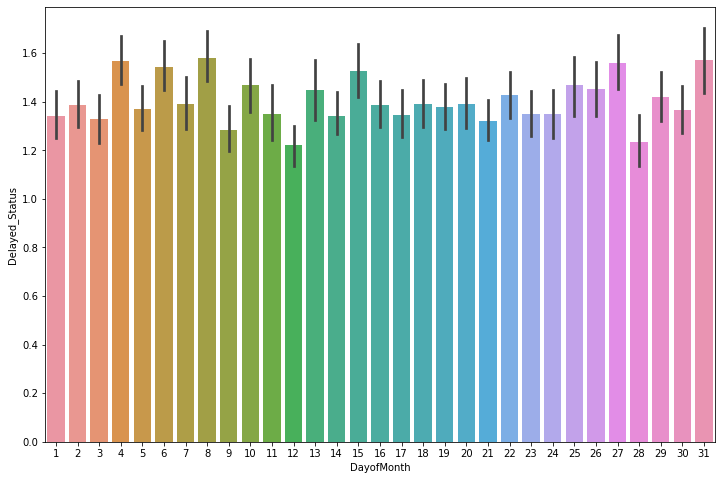

In [47]:
sns.barplot(data=train, x=train.DayofMonth, y=train.Delayed_Status)

Visually, variability is evident over the days of the month.

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and day of the month are independent.
- Alternative Hypothesis: Delayed status and day of the month are dependent.

In [48]:
observed = pd.crosstab(train.Delayed_Status, train.DayofMonth)

In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

4.3358342374987734e-07

In [50]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


### Scheduled Departure Hour

In [51]:
# df.CRSDepTime = pd.to_datetime(df.CRSDepTime , format='%H%M').dt.time
# df['departure_hour'] = pd.to_datetime(df['CRSDepTime'], format='%H:%M:%S').dt.hour
# df.CRSArrTime = pd.to_datetime(df.CRSArrTime , format='%H%M').dt.time
# df['arrival_hour'] = pd.to_datetime(df['CRSArrTime'], format='%H:%M:%S').dt.hour

<AxesSubplot:xlabel='departure_hour', ylabel='Delayed_Status'>

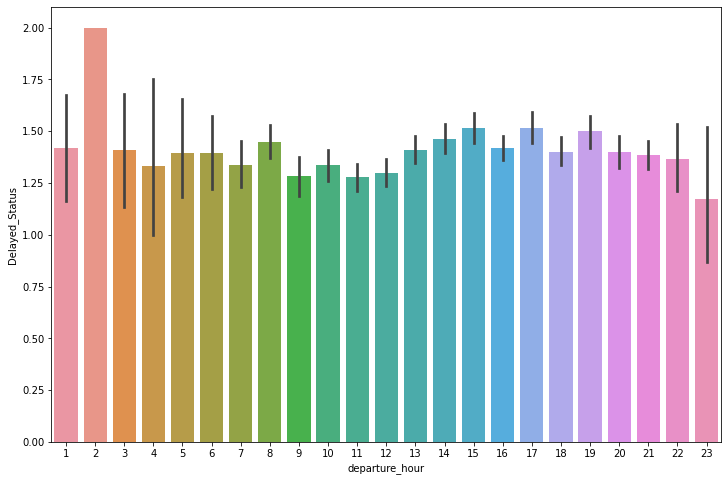

In [52]:
sns.barplot(data=train, y= 'Delayed_Status', x='departure_hour')

Visualization shows variability between the average delayed status and the scheduled hour of the departure. With 2AM being a problematic area.

**Next Steps: perform chi squared testing**

- Null Hypothesis: Delayed status and the scheduled departure hour are independent.
- Alternative Hypothesis: Delayed status and the scheduled departure hour are dependent.

In [53]:
observed = pd.crosstab(train.Delayed_Status, train.departure_hour)

In [54]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

1.1750329775978126e-06

In [55]:
if p < alpha:
    print("Reject the null")
else:
    print('Fail to reject the null')

Reject the null


**Answers to questions**
- Does the airline impact flight delays? **Yes, airlines and delayed status are dependent.**
- Does the airport impact flight delays? **No, airport departure and arrival location are independent with delayed status.**
     - Departure and Arrival
- Does the day of the week impact flight delays? **Yes, the day of the week and delayed status are dependent.**
- Does the month impact flight delays? **Yes, delayed status is dependent on the month in which a flight occurs.** 
- Are specific types of delays more likely to occur during a specified time?

In [56]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,test,validate)

In [57]:
X_train = train_scaled[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_train = train_scaled.Delayed_Status

X_validate = validate_scaled[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_validate = validate_scaled.Delayed_Status

X_test = test_scaled[['DayOfWeek', 'Month', 'UniqueCarrier_DL', 'UniqueCarrier_OO', 
                 'UniqueCarrier_UA', 'UniqueCarrier_WN']]
y_test = test_scaled.Delayed_Status

### Modeling

Baseline Prediction

In [420]:
X_train = train_scaled.drop(columns=['CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'TailNum','ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed_Status','Delayed'])
y_train = train_scaled.Delayed_Status

X_validate = validate_scaled.drop(columns=['CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'TailNum','ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed_Status','Delayed'])
y_validate = validate_scaled.Delayed_Status

X_test = test_scaled.drop(columns=['CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'TailNum','ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'Delayed_Status','Delayed'])
y_test = test_scaled.Delayed_Status

In [421]:
train.Delayed_Status.mode()

0    1
dtype: int64

In [422]:
train.Delayed_Status.value_counts(normalize=True)

1    0.653135
2    0.215070
3    0.064507
0    0.034756
4    0.032532
Name: Delayed_Status, dtype: float64

In [423]:
baseline_prediction = (y_train == 1)

baseline_accuracy = baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.65


### Decision Tree

In [324]:
# create the model
clf = DecisionTreeClassifier(max_depth=4, random_state=123)

In [380]:
# fit the model
clf = clf.fit(X_train, y_train)

In [381]:
# make prediction on train obeservations
y_pred = clf.predict(X_train)

In [382]:
# plot_tree(clf, feature_names=X_train.columns, class_names = clf.classes_.astype(str), rounded=True)

In [383]:
y_pred_proba = clf.predict_proba(X_train)

In [384]:
print('Accuracy on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy on training set: 0.65


In [385]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.65      1.00      0.79      4698
           2       0.67      0.00      0.01      1547
           3       1.00      0.00      0.00       464
           4       0.00      0.00      0.00       234

    accuracy                           0.65      7193
   macro avg       0.46      0.20      0.16      7193
weighted avg       0.63      0.65      0.52      7193



In [387]:
print('Accuracy on training set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy on training set: 0.66


In [386]:
# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.66      1.00      0.80      1701
           2       0.00      0.00      0.00       556
           3       0.00      0.00      0.00       155
           4       0.00      0.00      0.00        81

    accuracy                           0.66      2570
   macro avg       0.13      0.20      0.16      2570
weighted avg       0.44      0.66      0.53      2570



In [334]:
metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.653135,0.661868,-0.008733
1,3,0.653135,0.661868,-0.008733
2,4,0.653691,0.661868,-0.008177
3,5,0.658279,0.659922,-0.001643
4,6,0.663979,0.657198,0.006780
5,7,0.671069,0.651751,0.019318
6,8,0.681079,0.641245,0.039834
7,9,0.696093,0.635019,0.061074
8,10,0.711803,0.629961,0.081842
9,11,0.732796,0.613619,0.119177


### Random Forrests

In [388]:
# create the model
rf = RandomForestClassifier(max_depth=7, 
                            random_state=123)

In [389]:
# fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, random_state=123)

In [390]:
print(rf.feature_importances_)

[0.         0.10487808 0.16209666 0.09847543 0.16315224 0.21124923
 0.04849411 0.01879671 0.00979121 0.03562806 0.01158097 0.13585731]


In [391]:
y_pred = rf.predict(X_train)

In [392]:
y_pred_proba = rf.predict_proba(X_train)

In [393]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.65


In [394]:
y_pred = rf.predict(X_validate)

In [395]:
y_pred_proba = rf.predict_proba(X_validate)

In [396]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.66      1.00      0.80      1701
           2       0.00      0.00      0.00       556
           3       0.00      0.00      0.00       155
           4       0.00      0.00      0.00        81

    accuracy                           0.66      2570
   macro avg       0.13      0.20      0.16      2570
weighted avg       0.44      0.66      0.53      2570



In [397]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.653135,0.661868,-0.008733
1,3,0.653135,0.661868,-0.008733
2,4,0.653135,0.661868,-0.008733
3,5,0.653135,0.661868,-0.008733
4,6,0.653135,0.661868,-0.008733
5,7,0.653969,0.661868,-0.007899
6,8,0.657862,0.662646,-0.004784
7,9,0.663423,0.663035,0.000388
8,10,0.673989,0.665370,0.008619
9,11,0.693591,0.664981,0.028610


In [398]:
y_pred = rf.predict(X_test)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.65      1.00      0.79      2006
           2       0.00      0.00      0.00       669
           3       0.00      0.00      0.00       219
           4       0.00      0.00      0.00       101

    accuracy                           0.65      3083
   macro avg       0.13      0.20      0.16      3083
weighted avg       0.42      0.65      0.51      3083



### KNN

In [399]:
knn = KNeighborsClassifier(n_neighbors=22)

In [400]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [401]:
y_pred = knn.predict(X_train)

In [402]:
y_pred_proba = knn.predict_proba(X_train)

In [403]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.65


In [404]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.66      1.00      0.79      4698
           2       0.39      0.01      0.03      1547
           3       0.00      0.00      0.00       464
           4       0.00      0.00      0.00       234

    accuracy                           0.65      7193
   macro avg       0.21      0.20      0.16      7193
weighted avg       0.51      0.65      0.52      7193



In [405]:
y_pred = knn.predict(X_validate)

In [406]:
y_pred_proba = knn.predict_proba(X_validate)

In [407]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

Accuracy of KNN classifier on validate set: 0.66


In [408]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.66      0.99      0.80      1701
           2       0.40      0.02      0.03       556
           3       0.00      0.00      0.00       155
           4       0.00      0.00      0.00        81

    accuracy                           0.66      2570
   macro avg       0.21      0.20      0.17      2570
weighted avg       0.53      0.66      0.53      2570



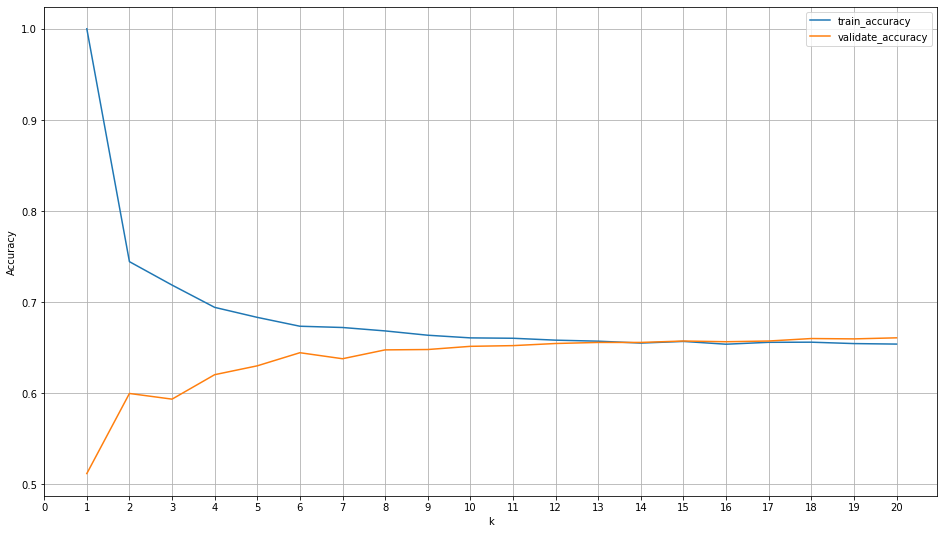

In [424]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

### Regression

In [410]:
logit = LogisticRegression(C=.1)

In [411]:
logit.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [412]:
y_pred = logit.predict(X_train)

In [413]:
y_pred_proba = logit.predict_proba(X_train)

In [414]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.65


In [415]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       250
           1       0.65      1.00      0.79      4698
           2       0.00      0.00      0.00      1547
           3       0.00      0.00      0.00       464
           4       0.00      0.00      0.00       234

    accuracy                           0.65      7193
   macro avg       0.13      0.20      0.16      7193
weighted avg       0.43      0.65      0.52      7193



In [416]:
y_pred = logit.predict(X_validate)

In [417]:
y_pred_proba = logit.predict_proba(X_validate)

In [418]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.66      1.00      0.80      1701
           2       0.00      0.00      0.00       556
           3       0.00      0.00      0.00       155
           4       0.00      0.00      0.00        81

    accuracy                           0.66      2570
   macro avg       0.13      0.20      0.16      2570
weighted avg       0.44      0.66      0.53      2570



### Choosing KNN as the best model, all other models are within the same accuracy of 65%-66%, however, KNN makes predictions other than only choosing delayed status 1.

In [409]:
y_pred = knn.predict(X_test)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.65      0.99      0.79      2006
           2       0.27      0.01      0.03       669
           3       0.00      0.00      0.00       219
           4       0.00      0.00      0.00       101

    accuracy                           0.65      3083
   macro avg       0.19      0.20      0.16      3083
weighted avg       0.48      0.65      0.52      3083



- Outcomes: Classification modeling does not beat the baseline of 65% accuracy.
    - I also attempted to model on Delayed to determine if a flight would be delayed, not just the time frame it would be delayed for. 
        - Both the baseline and models performed at 97%. There was no added benefit from modeling on this dataset.
- Things to do differently:
    - I significantly reduced the dataset to limit the flights that were flown by specific airlines and only departed or arrived at 5 airports.
        - In retrospect, I would maintain the majority of the data and then look into clustering and then attempt calssification models on the clusters.

Based of the 2008 flight data, consumers can expect to be delayed 15-59 minutes on 65% on their flights.
       